# Section 3: Sustentabilidad

In [3]:
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import  count
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import count
import numpy as np
import codecs

## A. Writing Json file with format 
def write_json_UTF8(jsonDir, name_file):
    with open(name_file, 'w') as outfile:
        json.dump(jsonDir, outfile, ensure_ascii=False)
    #read input file
    with codecs.open(name_file, 'r', encoding = "iso-8859-1") as file:
          lines = file.read()
    #write output file
    with codecs.open(name_file, 'w', encoding = 'utf8') as file:
          file.write(lines)
    print("CREATED: ", name_file)
    
## B. Fixing numbers
def repair_num(value):
    try:
        aux = float(value)
    except:
        "Existe algun signo"
        aux = ""
        for letra in str(value):

            if letra.isdigit():
                aux = aux+letra
            elif letra == ".":
                aux = aux+letra
        if aux == "":
            pass

    return float(aux)

## C. Formating Json
def DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm=False):

    globalDir = {}
    anioInit = -999
    listData = []
    dirData = {}
    initDir = True

    df_norm = None
    if norm:
        df_copy = df.copy()
        df_norm = (df_copy[varible_v]-df_copy[varible_v].min()) / \
            (df_copy[varible_v].max()-df_copy[varible_v].min())

    for i, anio, mes, var_value in zip(count(), df["anio"], df["mesSTR"], df[varible_v]):
        try:
            anio = int(anio)
        except:
            print("set:", anio)
            listData.append(dirData)
            break

        # Si todas son nan no sirve
        L = 0

        for index, v_reg in enumerate(varible_v):
            if str(df[v_reg].values[i]) == "nan":
                L = L+1
        if L == len(varible_v):
            print("allNone", anio)
            continue

        if anioInit < anio:
            if anioInit > 0:

                listData.append(dirData)
                dirData = {}
                initDir = True

        if initDir:
            dirData["anio"] = anio
            dirData["regiones"] = {}
            for index, v_reg in enumerate(varible_v):
                dirData["regiones"][reg_name[index]] = {"meses": {}}

            initDir = False

        for index, v_reg in enumerate(varible_v):
            dirData["regiones"][reg_name[index]]["meses"][mes] = {}

        for index, v_reg in enumerate(varible_v):
            # dirData["regiones"][reg_name[index]]["meses"][mes]["indicar_principal"]=df[v_reg].values[i]
            if norm:
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index]] = round(
                    float(df_norm[v_reg].values[i]), 4)
                if (df_norm[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            else:
                # si no hayd data
                data_value = repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" or len(str(data_value).lower()) == 0:
                    data_value = 0
                if data_value - int(data_value) > 0.0001:
                    data_value = round(data_value, 1)
                else:
                    data_value = int(data_value)
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes][variable_meaning[index]] = data_value
                if (df[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            if len(toolTip_v[index]) > 0:

                toolTip_values = [str(df[x].values[i])
                                  for x in toolTip_v[index]]
                tip = {}
                #print(index, v_reg, i, df[v_reg].values[i])
                data_value = repair_num(df[v_reg].values[i])

                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                # add data to tooltipe

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]

                for indexTool, name in enumerate(toolTip_mening[index]):
                    if str(toolTip_values[indexTool]).lower() == "nan":
                        tip[name] = "-"
                    else:
                        tip[name] = toolTip_values[indexTool]

                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
            else:
                tip = {}
                data_value = repair_num(df[v_reg].values[i])
                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]
                
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
                #old
                #dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"] ={}
                
        anioInit = anio

    return listData

## D. Creating image to download 
sns.set()
def create_image(df, varible_v, variable_meaning, save_dir):
    print("img", varible_v, variable_meaning)
    objetive_var = varible_v

    plt.close()
    plt.clf()
    
    df['date'] = df["Mes"].map(str) + '-' + df["anio"].map(str)
    for value in df['date'] :
        df['date'] = pd.to_datetime(
        df['date'], format='%m-%Y').dt.strftime('%m-%Y')

    date = []
    val = []
    for i, value in enumerate(df[objetive_var]):
        if str(value) == "nan":
            continue
        else:
            value = repair_num(value)
            val.append(value)
            print((df['date'].values[i]))
            date.append(df['date'].values[i])

    df = pd.DataFrame(columns=['date', objetive_var])
    df['date'] = date
    df[objetive_var] = val

    fig, ax = plt.subplots()
    sns.set_style("darkgrid")

    print(len(df['date']), len(df[objetive_var]))

    ax = sns.lineplot(x=range(0, len(df['date'])), y=df[objetive_var])

    """
    max_xticks = 11
    xloc = plt.MaxNLocator(max_xticks)
    print(xloc)
    ax.xaxis.set_major_locator(xloc)
    """

    names = []
    print(len(df['date']))

    ran = int((len(df['date'])+.5)/10)
    if ran == 0:
        ran = 1
    if len(df['date']) / ran < 10:
        ran = 1
    names = [df['date'].values[d] for d in range(0, len(df['date']), ran)]
    ticklabels = names
    ax.set_xticks(range(0, len(df['date'])+1, ran))
    ax.set_xticklabels(ticklabels)
    fig.autofmt_xdate()
    plt.title(variable_meaning)
    plt.ylabel(variable_meaning)
    plt.savefig(save_dir, dpi=100)
    plt.show()
    
def naming_image(x):
    return global_dir + "/img/" + init_data_name + x + '.png'

def naming_file(y):
    return global_dir + "/" + init_data_name + y + '.json'    

## E. Reading Data from API 
file = 'Sustentabilidad.xlsx'
global_dir = "./data"
norm = False  # no normalizada
init_data_name = "Sust_"
link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/Sustentabilidad.xlsx"
link_img = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/img/"
link_glosario = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header = [{"titulo": None, "Fuente": None, "LinkDatosOriginales": None,
                "comment": None, "linkPlot": None, "glosario": None}]

## Processing Data 

### 1) Sust_01_Kpi_comercial.json 

set: None
img Indicador ANUAL de Sustentabilidad Comercial Comercial  [%]
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
9 9
9


<Figure size 432x288 with 0 Axes>

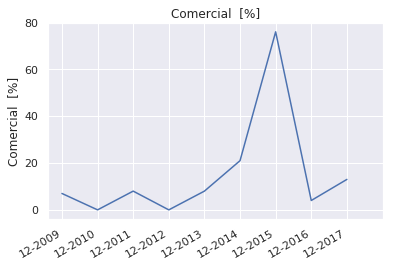

CREATED:  ./data/Sust_01_Kpi_comercial.json


In [4]:
sheetname = 'KPI'
full_file_name = '01_Kpi_comercial'
info_header[0]["titulo"] = "Participación anual de edificaciones sustentables, uso Comercial"
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Comercial, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación al año. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == 'KPI':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador ANUAL de Sustentabilidad Comercial"]]
    dataCorto = [
        ["Comercial  [%]"]
    ]

    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 2) Sust_02_Kpi_publico.json 

set: None
img Indicador ANUAL de Sustentabilidad Público leed-ces Publico [%]
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
9 9
9


<Figure size 432x288 with 0 Axes>

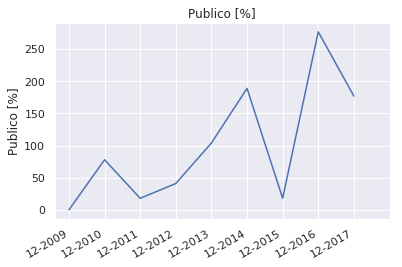

CREATED:  ./data/Sust_02_Kpi_publico.json


In [5]:
sheetname = 'KPI'
filename = "Kpi_publico.json"
full_file_name = '02_Kpi_publico'
info_header[0]["titulo"] = "Participación anual de edificaciones sustentables, uso Público"
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Público, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación al año. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == 'KPI':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador ANUAL de Sustentabilidad Público leed-ces"]]
    dataCorto = [["Publico [%]"]]

    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 3)  Sust_03_Kpi_residencial.json

set: None
img Indicador ANUAL de Residencial Residencial [%]
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
9 9
9


<Figure size 432x288 with 0 Axes>

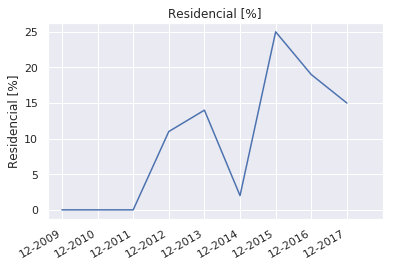

CREATED:  ./data/Sust_03_Kpi_residencial.json


In [6]:
sheetname = 'KPI'
full_file_name = '03_Kpi_residencial'
info_header[0]["titulo"] = "Participación anual de edificaciones sustentables, uso Residencial"
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Residencial, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación al año. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == 'KPI':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador ANUAL de Residencial"]]
    dataCorto = [["Residencial [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 4) Sust_04_Kpi_total.json 

set: None
img Indicador ANUAL de Sustentabilidad Total suma Total [%]
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
9 9
9


<Figure size 432x288 with 0 Axes>

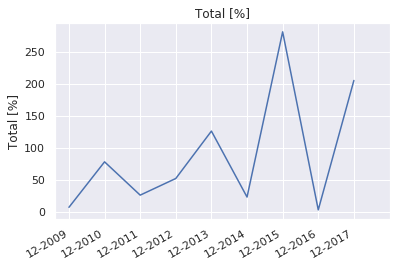

CREATED:  ./data/Sust_04_Kpi_total.json


In [7]:
sheetname = 'KPI'
full_file_name = '04_Kpi_total'
info_header[0]["titulo"] = "Participación anual de edificaciones sustentables, Total usos"
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de todos los usos, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación al año. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == 'KPI':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador ANUAL de Sustentabilidad Total suma"]]
    dataCorto = [["Total [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)   

### 5) Sust_05_serie_comercial.json 

set: None
img Indicador MENSUAL de Sustentabilidad Comercial Comercial  [%]
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2

<Figure size 432x288 with 0 Axes>

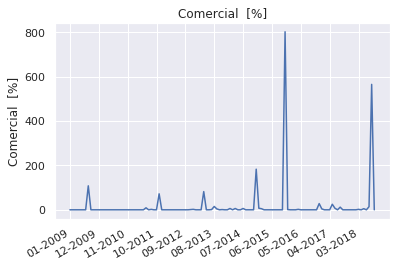

CREATED:  ./data/Sust_05_serie_comercial.json


In [8]:
sheetname = 'Indicador Sustentabilidad'
full_file_name = '05_serie_comercial'
info_header[0]["titulo"] = "Participación mensual de edificaciones sustentables, uso Comercial"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Comercial, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación mensual. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname == 'Indicador Sustentabilidad':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador MENSUAL de Sustentabilidad Comercial"]]
    dataCorto = [["Comercial  [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 6) Sust_06_serie_publico.json 

set: None
img Indicador MENSUAL de Sustentabilidad Público Publico [%]
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
0

<Figure size 432x288 with 0 Axes>

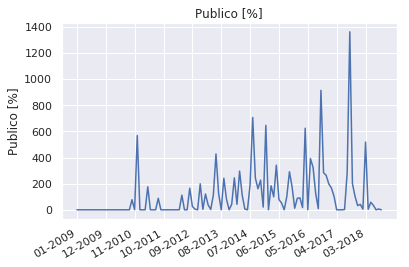

CREATED:  ./data/Sust_06_serie_publico.json


In [9]:
sheetname = 'Indicador Sustentabilidad'
full_file_name = '06_serie_publico'
info_header[0]["titulo"] = "Participación mensual de edificaciones sustentables, uso Público"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Público, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación mensual. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname == 'Indicador Sustentabilidad':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador MENSUAL de Sustentabilidad Público"]]
    dataCorto = [["Publico [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)

### 7) Sust_07_serie_residencial.json 

set: None
img Indicador MENSUAL de Sustentabilidad Residencial Residencial [%]
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
0

<Figure size 432x288 with 0 Axes>

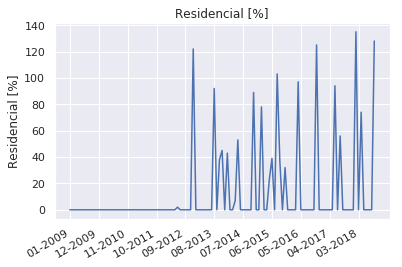

CREATED:  ./data/Sust_07_serie_residencial.json


In [10]:
sheetname = 'Indicador Sustentabilidad'
full_file_name = '07_serie_residencial'
info_header[0]["titulo"] = "Participación mensual de edificaciones sustentables, uso Residencial"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de uso Residencial, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación mensual. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname == 'Indicador Sustentabilidad':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador MENSUAL de Sustentabilidad Residencial"]]
    dataCorto = [["Residencial [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 8) Sust_08_serie_total.json 

set: None
img Indicador MENSUAL de Sustentabilidad Total Total [%]
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-20

<Figure size 432x288 with 0 Axes>

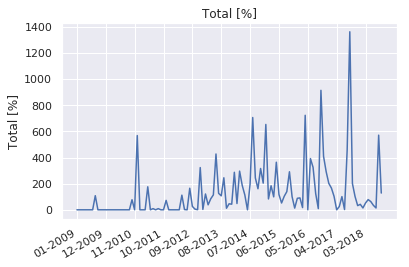

CREATED:  ./data/Sust_08_serie_total.json


In [11]:
sheetname = 'Indicador Sustentabilidad'
full_file_name = '08_serie_total'
info_header[0]["titulo"] = "Participación mensual de edificaciones sustentables, Total usos"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Superficie de proyectos de todos los usos, con al menos 1 certificación sustentable, respecto al total de superficies con Permiso de Edificación mensual. Cálculo propio a partir de fuentes de USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["Fuente"] = "USGBC, Chile GBC, IC, CChC, INE."
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname == 'Indicador Sustentabilidad':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Indicador MENSUAL de Sustentabilidad Total"]]
    dataCorto = [["Total [%]"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)

### 9) Sust_09_Num_proyectos_CES.json

In [12]:
sheetname = 'CES_leed_Anio'
full_file_name = '09_Num_proyectos_CES'
info_header[0]["titulo"] = "Proyectos certificados por tipo de Certificación y tipo de proyecto"
info_header[0]["Fuente"] = "LEED - CES"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cantidad de proyectos certificados por mes y año de certificación. Fuentes: USGBC, Chile GBC e Instituto de la Construcción (IC)"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'CES_leed_Anio':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Total CES", "Total LEED"]
    variable_meaning = ["Total", "Total" ]
    reg_name = [" CES", "LEED"]
    toolTip_v = [["Certificado","Sobresaliente","Destacado" ],
                 ["Platinum","Gold","Silver","Certified"]]
    toolTip_mening = [["Certificado","Sobresaliente","Destacado" ],
                 ["Platinum","Gold","Silver","Certified"]]
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

set: None
CREATED:  ./data/Sust_09_Num_proyectos_CES.json


### 10) Sust_10_cev1_cat.json 

In [13]:
sheetname = 'ClasificacionConteoCEV1'
full_file_name = '10_cev1_cat'
info_header[0]["titulo"] = "Proyectos con Calificación Energética de Viviendas versión 1 (CEV v1)"
info_header[0]["Fuente"] = "CEV"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cantidad de proyectos con calificación por año de etiquetado. Año corresponde al año de etiquetado. La versión 1 de CEV corresponde a la primera etapa desde el 2013 a 2018. Fuentes: MINVU"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'ClasificacionConteoCEV1':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["A","B", "C", "D","E" ,"F","G"]
    variable_meaning = ["A","B", "C", "D","E" ,"F","G"]
    reg_name = ["A","B", "C", "D","E" ,"F","G"]
    toolTip_v = [['A Departamento','A Casa Pareada/Continua','A Casa Aislada'],	
                 ['B Departamento','B Casa Pareada/Continua','B Casa Aislada'],	
                 ['C Departamento','C Casa Pareada/Continua','C Casa Aislada'],
                 ['D Departamento','D Casa Pareada/Continua','D Casa Aislada'],	
                 ['E Departamento','E Casa Pareada/Continua','E Casa Aislada'],	
                 ['F Departamento','F Casa Pareada/Continua','F Casa Aislada'],	
                 ['G Departamento','G Casa Pareada/Continua','G Casa Aislada']]
    toolTip_mening = [['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada']]
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

set: None
CREATED:  ./data/Sust_10_cev1_cat.json


### 11) Sust_11_cev2_cat.json

In [14]:
sheetname = 'ClasificacionConteoCEV2'
full_file_name ='11_cev2_cat'
info_header[0]["titulo"] = "Proyectos con Calificación Energética de Viviendas versión 2 (CEV v2)"
info_header[0]["Fuente"] = "CEV"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cantidad de proyectos con calificación por año de etiquetado. Año corresponde al año de etiquetado. La versión 2 de CEV corresponde a la segunda etapa desde el 2018 a la actualidad. Fuentes: MINVU"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'ClasificacionConteoCEV2':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["A","B", "C", "D","E" ,"F","G"]
    variable_meaning = ["A","B", "C", "D","E" ,"F","G"]
    reg_name = ["A","B", "C", "D","E" ,"F","G"]
    toolTip_v = [['A Departamento','A Casa Pareada/Continua','A Casa Aislada'],	
                 ['B Departamento','B Casa Pareada/Continua','B Casa Aislada'],	
                 ['C Departamento','C Casa Pareada/Continua','C Casa Aislada'],
                 ['D Departamento','D Casa Pareada/Continua','D Casa Aislada'],	
                 ['E Departamento','E Casa Pareada/Continua','E Casa Aislada'],	
                 ['F Departamento','F Casa Pareada/Continua','F Casa Aislada'],	
                 ['G Departamento','G Casa Pareada/Continua','G Casa Aislada']]
    toolTip_mening = [['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada'],	
                      ['Depto','Casa Pareada','Casa Aislada']]
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

set: None
CREATED:  ./data/Sust_11_cev2_cat.json


### 12) Sust_12_output_leed_ces.geojson !!!

In [15]:
# link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/LEED.xlsx"
# link_img = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
# link_glosario="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
# info_header=[ {"titulo":None,"Fuente":None, "LinkDatosOriginales":None, 
#                "comment":None, "linkPlot":None,"glosario":None}]
# info_header[0]["titulo"]="LEED"
# info_header[0]["Fuente"]="LEED"
# info_header[0]["LinkDatosOriginales"]=link_data
# info_header[0]["comment"]="LEED"+": obtenido desde USGBC"
# info_header[0]["linkPlot"]=""
# info_header[0]["glosario"]=link_glosario+"general.pdf"

# Link="./Public/data/Sustentabilidad.xlsx"
# import geojson
# with open("Leed_con_Centroides(1).geojson") as f:
#     gj = geojson.load(f)

# print(gj.keys())

# for element in gj['features']:
#     print(element.keys())
#     if element['properties']["iscertified"] == "Yes":
#         element['properties']["tooltip"]={ "Nombre":element['properties']["projectname"], 
#                                            "Tipo:":element['properties']["projecttypes"],
#                                            "Certificación":element['properties']["certlevel"],
#                                           "Año":element['properties']["ano_registro"] }
#     else:
#          element['properties']["tooltip"]={ "Nombre":element['properties']["projectname"], "Certificación": "En Tramite"}

# gj = [info_header,gj ]
# with open('output_leed2.geojson', 'w') as outfile:
# 	     geojson.dump(gj, outfile)